# Bank Customer Churn Prediction Model
### Using Artificial Neural Network

- In this dataset there are 13 I/P variables and one target variable (Exited).
- Based on the I/P variables, we have to predict if the customer is likely to exit the bank or not.


### Data Preprocessing

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
dataset.shape

(10000, 14)

In [4]:
# As there is no impact of RowNumber, CustomerId and Surname on the model prediction
# So these columns will be removed
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [5]:
# Create dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [6]:
# Concatenate the Data Frames
X=pd.concat([X,geography,gender],axis=1)

In [7]:
# Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)

In [8]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [9]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Feature Scaling

In [10]:
# In ANN neuron wights get multiplied with input, so it is necessary to scale the inputs to a common scale.
# Also it helps in easier multiplication as I/Ps are scaled down
# It also helps in back propogation as derivatives can be easily found with smaller values.
# As a result, convergence will happen quickly.

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [11]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [12]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

### Artificial Neural Network

In [13]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential #Responsible for creating ANN,CNN and RNN
from keras.layers import Dense #For creating hidden layers
from keras.layers import LeakyReLU,PReLU,ELU #Activation Functions
from keras.layers import Dropout #Used for regularization in deep neural networks

In [14]:
# Initialising the ANN. This will create an empty neural network
classifier = Sequential()

In [15]:
X_train.shape

(8000, 11)

In [16]:
# Adding the input layer and the first hidden layer
# Relu activation works best with he_uniform or he_normal weight initialization techniques
# Units means the number of neurons in hidden layer 1
# input_dim means the number of input features
# Adding a Dropout layer is optional here as the neural network is not very deep. Though it prevents overfitting.

classifier.add(Dense(units = 10, kernel_initializer = 'he_normal',activation='relu',input_dim = 11))
classifier.add(Dropout(0.3))

In [17]:
# Adding the second hidden layer
classifier.add(Dense(units = 20, kernel_initializer = 'he_normal',activation='relu'))
classifier.add(Dropout(0.4))

In [18]:
# 3rd hidden layer
classifier.add(Dense(units = 15, kernel_initializer = 'he_normal',activation='relu'))
classifier.add(Dropout(0.2))

In [19]:
# Adding the output layer
# As this is a binary classification problem, so sigmoid AF is used in the output layer

classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

In [20]:
# Compiling the ANN
# Use Adam optimizer as it is the best option available
# Use binary_crossentropy for loss function as this is a binary classification problem

classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [22]:
# Fitting the ANN to the Training set
# Create batch_size of 10 and 100 epoches (forward and backward propagation)

model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, epochs = 100)

Epoch 1/100
536/536 [==============================] - 3s 2ms/step - loss: 0.8722 - accuracy: 0.5659 - val_loss: 0.5313 - val_accuracy: 0.7955
Epoch 2/100
536/536 [==============================] - 1s 1ms/step - loss: 0.6014 - accuracy: 0.7600 - val_loss: 0.5098 - val_accuracy: 0.7955
Epoch 3/100
536/536 [==============================] - 1s 1ms/step - loss: 0.5534 - accuracy: 0.7867 - val_loss: 0.5015 - val_accuracy: 0.7955
Epoch 4/100
536/536 [==============================] - 1s 1ms/step - loss: 0.5459 - accuracy: 0.7826 - val_loss: 0.4961 - val_accuracy: 0.7955
Epoch 5/100
536/536 [==============================] - 1s 1ms/step - loss: 0.5302 - accuracy: 0.7920 - val_loss: 0.4900 - val_accuracy: 0.7955
Epoch 6/100
536/536 [==============================] - 1s 1ms/step - loss: 0.5366 - accuracy: 0.7821 - val_loss: 0.4847 - val_accuracy: 0.7955
Epoch 7/100
536/536 [==============================] - 1s 1ms/step - loss: 0.5130 - accuracy: 0.7904 - val_loss: 0.4798 - val_accuracy: 0.7955

Epoch 58/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4181 - accuracy: 0.8175 - val_loss: 0.4146 - val_accuracy: 0.8213
Epoch 59/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4280 - accuracy: 0.8177 - val_loss: 0.4146 - val_accuracy: 0.8209
Epoch 60/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4348 - accuracy: 0.8102 - val_loss: 0.4136 - val_accuracy: 0.8239
Epoch 61/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4178 - accuracy: 0.8149 - val_loss: 0.4144 - val_accuracy: 0.8205
Epoch 62/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4102 - accuracy: 0.8197 - val_loss: 0.4118 - val_accuracy: 0.8239
Epoch 63/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4090 - accuracy: 0.8258 - val_loss: 0.4121 - val_accuracy: 0.8243
Epoch 64/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4308 - accuracy: 0.8060 - val_loss: 0.4116 - val_accuracy:

In [23]:
# List all data in history
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


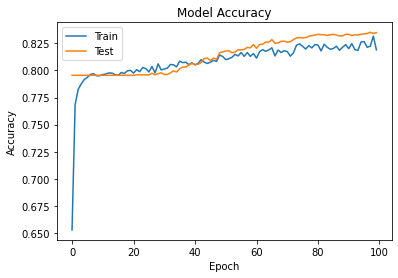

In [29]:
# Summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

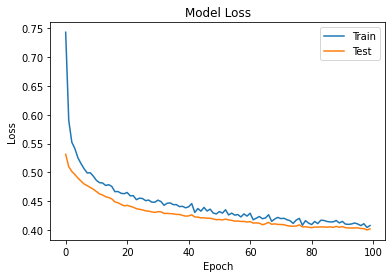

In [26]:
# Summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

### Model Predictions and Evaluation

In [30]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [33]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1577,   18],
       [ 286,  119]], dtype=int64)

In [36]:
# Making the Confusion Matrix
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91      1595
           1       0.87      0.29      0.44       405

    accuracy                           0.85      2000
   macro avg       0.86      0.64      0.68      2000
weighted avg       0.85      0.85      0.82      2000



In [34]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test, y_pred)
score

0.848